In [1]:
import argparse
import os
import pickle
import shutil
import warnings
from pathlib import Path
from pprint import pprint

import matplotlib.pyplot as plt
import mmcv
import numpy as np
import torch
from depth.apis import multi_gpu_test, single_gpu_test
from depth.datasets import build_dataloader, build_dataset
from depth.datasets.pipelines import Compose
from depth.models import build_depther
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmcv.runner import get_dist_info, init_dist, load_checkpoint, wrap_fp16_model
from mmcv.utils import DictAction
from torchvision import transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
print(device)

%reload_ext autoreload
%autoreload 2


cuda


HEREEEEEEEEE False
HEREEEEEEEEE False


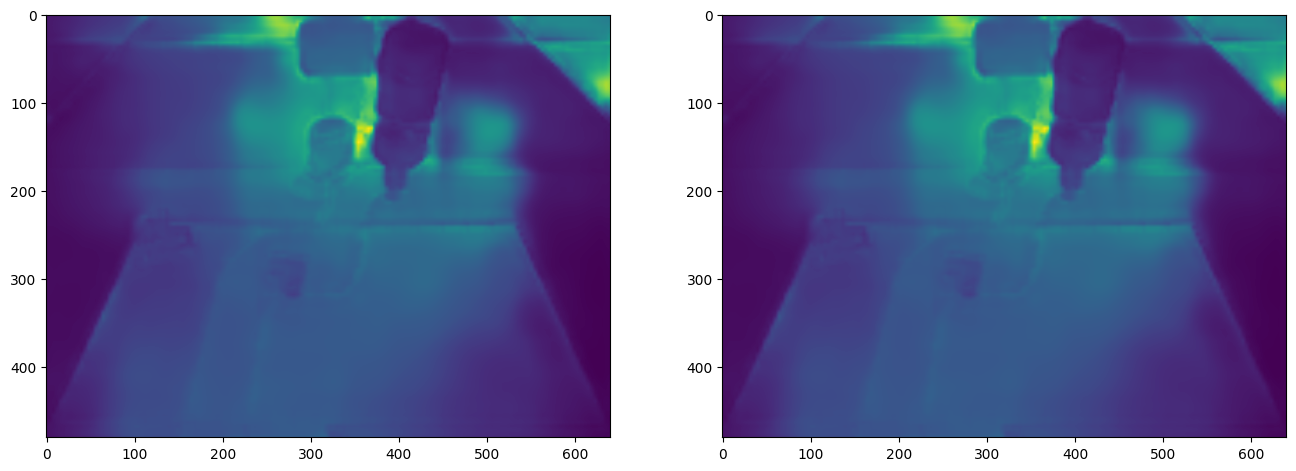

In [14]:
path_to_images = Path("dataset/block-insertion-test/color/000000-1.pkl")
path_to_config = Path(
    "Monocular-Depth-Estimation-Toolbox/configs/binsformer/binsformer_swint_w7_nyu.py"
)
path_to_checkpoint = Path("checkpoints/binsformer_swint_nyu_converted.pth")

batch = (
    torch.Tensor(pickle.load(open(path_to_images, "rb")))
    .reshape((6, 480, 640, 3))
    .permute(0, 3, 1, 2)
    .to(device)
)
preprocess = transforms.Compose(
    [transforms.Normalize(mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375])]
)
img_metas = [
    {
        "pad_shape": tuple(_.shape),
        "img_shape": tuple(_.shape),
        "ori_shape": tuple(_.shape),
        "scale_factor": 1,
        "flip": False,
        "img_norm_cfg": {
            "mean": _.mean(axis=(1, 2)),
            "std": _.mean(axis=(1, 2)),
        },
    }
    for _ in batch
]
with torch.no_grad():
    model.eval()
    outputs1 = model.forward(
        [preprocess(batch)], [img_metas], return_loss=False
    )
    outputs2 = model.forward(
        [preprocess(batch)], [img_metas], return_loss=False
    )



In [4]:
cfg = mmcv.Config.fromfile(path_to_config)
print(cfg.model.pretrained, "here", cfg.data.test)
# cfg.model.pretrained = None
# cfg.data.test.test_mode = True
# pprint(cfg._cfg_dict)
model = build_depther(cfg.model, test_cfg=cfg.get("test_cfg"))
checkpoint = load_checkpoint(model, str(path_to_checkpoint), map_location="cpu")
model = model.to(device)

https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_tiny_patch4_window7_224.pth here {'type': 'NYUBinFormerDataset', 'data_root': 'data/nyu/', 'depth_scale': 1000, 'split': 'nyu_test.txt', 'pipeline': [{'type': 'LoadImageFromFile'}, {'type': 'MultiScaleFlipAug', 'img_scale': (480, 640), 'flip': True, 'flip_direction': 'horizontal', 'transforms': [{'type': 'RandomFlip', 'direction': 'horizontal'}, {'type': 'Normalize', 'mean': [123.675, 116.28, 103.53], 'std': [58.395, 57.12, 57.375], 'to_rgb': True}, {'type': 'ImageToTensor', 'keys': ['img']}, {'type': 'Collect', 'keys': ['img']}]}], 'garg_crop': False, 'eigen_crop': True, 'min_depth': 0.001, 'max_depth': 10}


/home/matias/RECVIS-transporter-networks/Monocular-Depth-Estimation-Toolbox/depth/models/backbones/swin.py:612: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/opt/conda/lib/python3.7/site-packages/mmcv/cnn/bricks/transformer.py:342: UserWarning: The arguments `feedforward_channels` in BaseTransformerLayer has been deprecated, now you should set `feedforward_channels` and other FFN related arguments to a dict named `ffn_cfgs`. 
  f'The arguments `{ori_name}` in BaseTransformerLayer '
/opt/conda/lib/python3.7/site-packages/mmcv/cnn/bricks/transformer.py:342: UserWarning: The arguments `ffn_dropout` in BaseTransformerLayer has been deprecated, now you should set `ffn_drop` and other FFN related arguments to a dict named `ffn_cfgs`. 
  f'The arguments `{ori_name}` in BaseTransformerLayer '
/opt/conda/lib/python3.7/site-packages/mmcv/cnn/bricks/transformer.py:92: UserWarning: The 

load checkpoint from local path: checkpoints/binsformer_swint_nyu_converted.pth


In [15]:
cfg = mmcv.Config.fromfile(Path("Monocular-Depth-Estimation-Toolbox/configs/adabins/adabins_efnetb5ap_kitti_24e.py"))
adabins = build_depther(cfg.model, test_cfg=cfg.get("test_cfg"))
checkpoint = load_checkpoint(adabins, str(Path("checkpoints/adabins_efnetb5_kitti.pth")), map_location="cpu")
adabins = adabins.to(device)
adabins.eval()

Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/archive/master.zip" to /home/matias/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b5_ap-9e82fae8.pth" to /home/matias/.cache/torch/hub/checkpoints/tf_efficientnet_b5_ap-9e82fae8.pth


load checkpoint from local path: checkpoints/adabins_efnetb5_kitti.pth


DepthEncoderDecoder(
  (backbone): EfficientNet(
    (original_model): GenEfficientNet(
      (conv_stem): Conv2dSame(3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn1): BatchNorm2d(48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (act1): SiLU(inplace=True)
      (blocks): Sequential(
        (0): Sequential(
          (0): DepthwiseSeparableConv(
            (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (bn1): BatchNorm2d(48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (act1): SiLU(inplace=True)
            (se): SqueezeExcite(
              (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
              (act1): SiLU(inplace=True)
              (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            )
            (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn2): BatchNorm2

[autoreload of depth.models.depther.encoder_decoder failed: Traceback (most recent call last):
  File "/home/matias/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/matias/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/matias/RECVIS-transporter-networks/Monocular-Depth-Estimation-Toolbox/depth/models/depther/encoder_decoder.py", line 15, in <module>
    class DepthEncoderDecoder(BaseDep

HEREEEEEEEEE False
HEREEEEEEEEE False


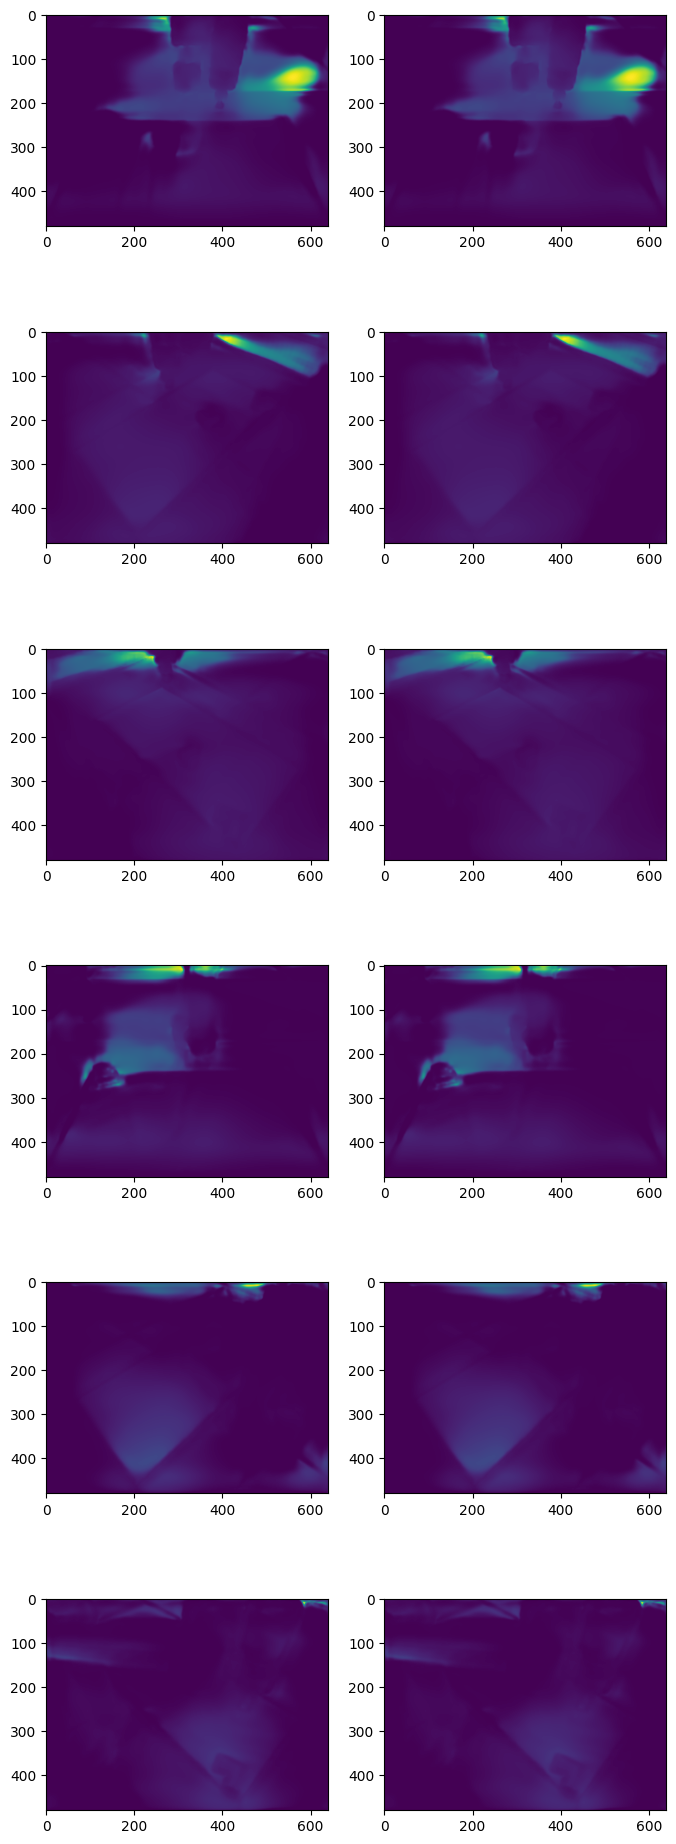

In [17]:
path_to_images = Path("dataset/block-insertion-test/color/000000-1.pkl")

batch = (
    torch.Tensor(pickle.load(open(path_to_images, "rb")))
    .reshape((6, 480, 640, 3))
    .permute(0, 3, 1, 2)
    .to(device)
)
preprocess = transforms.Compose(
    [transforms.Normalize(mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375])]
)
img_metas = [
    {
        "pad_shape": tuple(_.shape),
        "img_shape": tuple(_.shape),
        "ori_shape": tuple(_.shape),
        "scale_factor": 1,
        "flip": False,
        "img_norm_cfg": {
            "mean": _.mean(axis=(1, 2)),
            "std": _.mean(axis=(1, 2)),
        },
    }
    for _ in batch
]
with torch.no_grad():
    adabins.eval()
    outputs1 = adabins.forward(
        [preprocess(batch)], [img_metas], return_loss=False
    )
    outputs2 = adabins.forward(
        [preprocess(batch)], [img_metas], return_loss=False
    )

fig, axs = plt.subplots(len(outputs1), 2, figsize=(8, 24))
for index, (x, y) in enumerate(zip(outputs1, outputs2)):
    axs[index, 0].imshow(x.transpose(1, 2, 0))
    axs[index, 1].imshow(x.transpose(1, 2, 0))